### Exploratory Data Analysis

In [172]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Business Understanding 
This notebook is for the Udacity Nanodegree Data Scientist Course. I am using the Seattle Airbnb dataset and I try to devire insights for the following questions:

1. Is it possible to predict the price of a given room or apartment by using other variables ?
2. How does the price of change based on the type of property being rented of?
3. How does the price vary based on the location of the property within seattle?

In [80]:
#import data 
lst = pd.read_csv(r'Airbnb_data/listings.csv')
lst.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [38]:
cl = pd.read_csv(r'Airbnb_data/calendar.csv')
cl.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [39]:
cl.shape

(1393570, 4)

In [5]:
rw = pd.read_csv(r'Airbnb_data/reviews.csv')
rw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
num_rows = lst.shape[0] #the number of rows in the dataset
num_cols = lst.shape[1] #the number of rows in the dataset
num_rows, num_cols

(3818, 92)

In [35]:
lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [9]:
no_nulls = set(lst.columns[lst.notnull().sum() == 3818])
no_nulls

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [17]:
most_missing_cols = set(lst.columns[lst.isnull().mean() >0.75])
most_missing_cols

{'license', 'square_feet'}

#### Exploring Listing Dataset

In [81]:
# all column name related to pricing
col_price = [col for col in lst.columns if 'price' in col]
col_price   

['price', 'weekly_price', 'monthly_price']

In [82]:
#all price related columns in dataset
price_list =['security_deposit', 'cleaning_fee', 'price', 'weekly_price', 'monthly_price', 'extra_people']
print(price_list)

['security_deposit', 'cleaning_fee', 'price', 'weekly_price', 'monthly_price', 'extra_people']


In [83]:
for col in price_list:
    lst[col] = lst[col].str.replace('$', '').str.replace(',','').astype(float)
    
lst.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New mode

In [107]:
#percentage of missing values in the price columns
def miss (df, col):
    ''' input: dataframe 
               Column whose percentage of missing values is to be determined'''
    '''Output: % of missing values in the column'''
    missing_values = (lst[col].isnull().sum()/lst.shape[0])*100
    return missing_values


In [109]:
miss (lst, 'price'), miss (lst, 'weekly_price'),miss (lst, 'monthly_price'), miss (lst, 'cleaning_fee'), miss (lst, 'security_deposit'),

(0.0,
 47.38082765845993,
 60.267155578837084,
 26.977475117862753,
 51.12624410686223)

In [121]:
week_mon = lst[((lst['weekly_price'].isnull() == True) & (lst['monthly_price'].isnull() == True))]
week_mon.shape[1]
lst['weekly_price'].isnull().sum()

1809

In [123]:
week_mon.shape[1]/lst.shape[0] # proportion of listed accomodation without weekly or monthly prices stated

0.024096385542168676

All accodamtion listed have their prices stated. However 47% of them don't have weekly prices and 60% don't have monthly prices stated. About 2.5% don't have both weekly and monthly prices. about 27% charges cleaning fee and Half of the list accomodation receive security deposit upfront.

### Price

#### Exploring price variation according to property

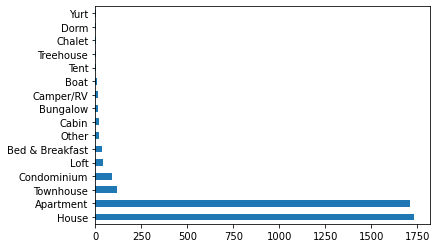

In [132]:
lst['property_type'].value_counts()
lst['property_type'].value_counts().plot(kind='barh');

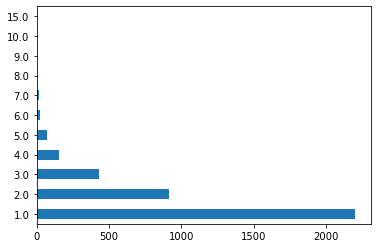

In [134]:
lst['beds'].value_counts().plot(kind='barh');

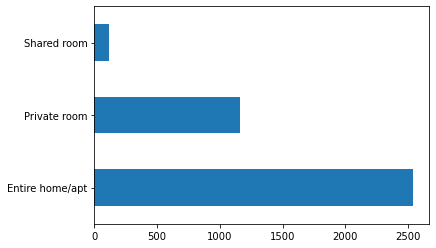

In [135]:
lst['room_type'].value_counts().plot(kind='barh');


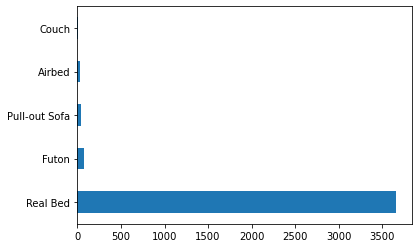

In [136]:
lst['bed_type'].value_counts().plot(kind='barh');

In [191]:
lst['property_type'].value_counts()/lst['property_type'].notnull().sum() #proportion of the different type of properties listed

House              0.454021
Apartment          0.447472
Townhouse          0.030914
Condominium        0.023841
Loft               0.010479
Bed & Breakfast    0.009693
Other              0.005764
Cabin              0.005502
Bungalow           0.003406
Camper/RV          0.003406
Boat               0.002096
Tent               0.001310
Treehouse          0.000786
Chalet             0.000524
Dorm               0.000524
Yurt               0.000262
Name: property_type, dtype: float64

In [137]:
lst.groupby("property_type")["price"].mean().sort_values()

property_type
Dorm                39.500000
Tent                54.000000
Other               94.681818
Chalet              98.500000
Yurt               100.000000
Treehouse          101.000000
Cabin              104.666667
Bed & Breakfast    112.054054
Bungalow           115.615385
Camper/RV          120.461538
Apartment          122.932670
Townhouse          129.457627
House              132.351414
Loft               135.700000
Condominium        151.109890
Boat               282.375000
Name: price, dtype: float64

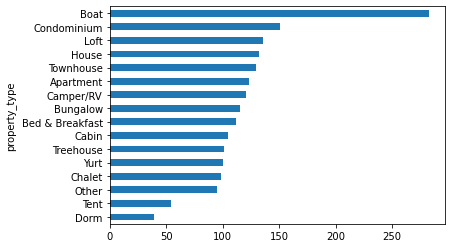

In [188]:
lst.groupby("property_type")["price"].mean().sort_values().plot(kind='barh'),;

In [168]:
lst['room_type'].value_counts()/lst['room_type'].notnull().sum() #proportion of the different type of room in the properties listed

Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64

In [138]:
lst.groupby("room_type")["price"].mean().sort_values()

room_type
Shared room         47.547009
Private room        75.044828
Entire home/apt    155.843369
Name: price, dtype: float64

In [169]:
lst['bed_type'].value_counts()/lst['bed_type'].notnull().sum() #proportion of the different type of beds provided in rooms in the properties listed

Real Bed         0.957831
Futon            0.019382
Pull-out Sofa    0.012310
Airbed           0.007072
Couch            0.003405
Name: bed_type, dtype: float64

In [139]:
lst.groupby("bed_type")["price"].mean().sort_values()

bed_type
Couch             64.307692
Futon             72.824324
Airbed            73.962963
Pull-out Sofa     77.276596
Real Bed         130.368882
Name: price, dtype: float64

In [157]:
lst[((lst['property_type'] == 'Boat') & (lst['bed_type'] == 'Couch'))]
lst[lst['property_type'] == 'Boat'].shape[0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3303,9331145,https://www.airbnb.com/rooms/9331145,20160104002432,2016-01-04,B&B on the Salty Sea,A 1977 Islander Freeport with a happy crew!,NaN,A 1977 Islander Freeport with a happy crew!,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/06de7a69-c...,https://a2.muscache.com/im/pictures/06de7a69-c...,https://a2.muscache.com/ac/pictures/06de7a69-c...,https://a2.muscache.com/ac/pictures/06de7a69-c...,10996259,https://www.airbnb.com/users/show/10996259,Benjamin,2014-01-03,"Bellingham, Washington, United States",NaN,within a day,50%,100%,f,https://a2.muscache.com/ac/pictures/9657315e-a...,https://a2.muscache.com/ac/pictures/9657315e-a...,Ballard,1.0,1.0,"['email', 'phone', 'facebook', 'kba']",t,t,"Seaview Avenue Northwest, Seattle, WA 98117, U...",Ballard,Sunset Hill,Ballard,Seattle,WA,98117,Seattle,"Seattle, WA",US,United States,47.679581,-122.404012,t,Boat,Private room,1,0.5,1.0,1.0,Couch,"{TV,""Cable TV"",Internet,Kitchen,""First Aid Kit...",NaN,75.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,a week ago,t,0,0,0,32,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


In [156]:
lst[((lst['property_type'] == 'Boat') & (lst['bed_type'] == 'Couch'))].shape[0]/lst[lst['property_type'] == 'Boat'].shape[0] # proportion of boat accomodation couch beds

0.125

In [159]:
lst[((lst['property_type'] == 'Boat') & (lst['bed_type'] == 'Real Bed'))].shape[0]/lst[lst['property_type'] == 'Boat'].shape[0] # proportion of boat accomodation couch beds

0.875

The most expensive property to rent a room in is the boat with an average price of 282 dollars. For this type of property, an individual can either get a couch or real bed. The least expensive is the dorm with an average price of 39.5 dollars. 

#### Price variation according to location

In [175]:
lst['neighbourhood_cleansed'].value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [179]:
lst.groupby("neighbourhood_cleansed")["price"].mean().sort_values()

neighbourhood_cleansed
Rainier Beach          68.555556
Olympic Hills          71.687500
South Delridge         74.666667
Georgetown             76.125000
North Delridge         76.375000
                         ...    
Montlake              182.789474
West Queen Anne       187.769231
Westlake              194.470588
Portage Bay           227.857143
Southeast Magnolia    231.705882
Name: price, Length: 87, dtype: float64

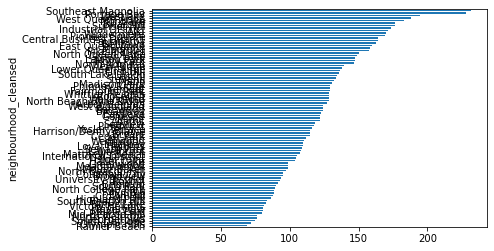

In [186]:
lst.groupby("neighbourhood_cleansed")["price"].mean().sort_values().plot(kind='barh');

Southeast Magnolia is the most expensive neighbourhood with a price of 232 dollars. The cheapest neighboor to get hosted in is Rainier Beach at 68 dollars

In [173]:
lst[['city','state','zipcode','market','smart_location','country_code','country']].describe()

,city,state,zipcode,market,smart_location,country_code,country
count,3818,3818,3811,3818,3818,3818,3818
unique,7,2,28,1,7,1,1
top,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States
freq,3810,3817,420,3818,3810,3818,3818


### Dtate processing

In [ ]:
listings_review_df['number_of_reviews'].value_counts()

In [43]:
#convert the 'date' column to datetime format
from datetime import datetime
cl['date']= pd.to_datetime(cl['date'])
cl.dtypes


listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [40]:
cl['price'] = cl['price'].str.replace('$', '').str.replace(',','').astype(float)
cl.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN


In [48]:
#split date into year, month and day
cl['year'] = cl['date'].dt.year
cl['month'] = cl['date'].dt.month
cl['day'] = cl['date'].dt.day
cl.head(3)

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016,1,4
1,241032,2016-01-05,t,85.0,2016,1,5
2,241032,2016-01-06,f,NaN,2016,1,6


In [49]:
cl['year'].value_counts()

2016    1385934
2017       7636
Name: year, dtype: int64

In [58]:
yr_16 = cl[cl['year'] == 2016]
yr_16.head()

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016,1,4
1,241032,2016-01-05,t,85.0,2016,1,5
2,241032,2016-01-06,f,NaN,2016,1,6
3,241032,2016-01-07,f,NaN,2016,1,7
4,241032,2016-01-08,f,NaN,2016,1,8


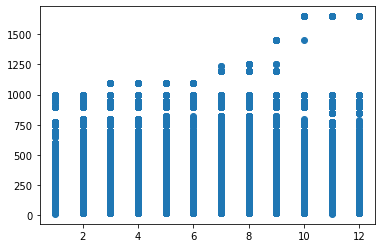

In [61]:
#most expensive period within a year
plt.scatter(yr_16['month'],yr_16['price'])

### Referece

https://www.kaggle.com/kwatanwa/seattle-airbnb-basic-eda-and-insights
1. https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python 
2. https://classroom.udacity.com/nanodegrees/nd025/parts/5c671264-6d88-412d-bb3a-0c2e07a8b915/modules/2db8605d-db49-4fbe-b91a-93fce9f18641/lessons/f3e386bb-fe90-4e3c-8fc5-ad2db83e6cf6/concepts/f83f3328-3c00-4d88-a366-0fd3e06e3a45
3. https://www.dezyre.com/recipes/split-datetime-data-create-multiple-feature-in-python
4. 